<a href="https://colab.research.google.com/github/Willymwa85/Cancer-Type-Prediction-using-K-Nearest-Neighbors-Algorithm-on-Gene-Expression-Data/blob/main/Prediction_of_Cancer_Type_using_KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for 'jovian.commit' to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1wUJ85lo6DqiDUvaUu9lhNWAwtYs9gHPf')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 898.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
Data = pd.read_csv('data (1).csv')
Data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [ ]:
Labels = pd.read_csv('labels.csv')
Labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


# 1. Read the data and labels from the provided files:

In [ ]:
import numpy as np

datafile = "data (1).csv"
labels_file = "labels.csv"

# Read the gene expression data
data = np.genfromtxt(datafile, delimiter=",", usecols=range(1, 20532), skip_header=1)

# Read the true cancer labels
true_label_names = np.genfromtxt(labels_file, delimiter=",", usecols=(1,), skip_header=1, dtype="str")

## 2. Convert the label names to numerical values for ease of computation:

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode label strings to numbers
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)

## 3. Split the data into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, true_labels, test_size=0.2, random_state=42)

## 4. Train the KNN model on the training data:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 5. Evaluate the model's accuracy on the testing data:

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## 6. Different values of n_neighbors

In [ ]:
# Try different values of n_neighbors
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for n_neighbors={k}: {accuracy:.2f}")

Accuracy for n_neighbors=1: 1.00
Accuracy for n_neighbors=2: 1.00
Accuracy for n_neighbors=3: 1.00
Accuracy for n_neighbors=4: 1.00
Accuracy for n_neighbors=5: 1.00
Accuracy for n_neighbors=6: 1.00
Accuracy for n_neighbors=7: 1.00
Accuracy for n_neighbors=8: 1.00
Accuracy for n_neighbors=9: 1.00
Accuracy for n_neighbors=10: 1.00
Accuracy for n_neighbors=11: 1.00
Accuracy for n_neighbors=12: 1.00
Accuracy for n_neighbors=13: 1.00
Accuracy for n_neighbors=14: 1.00
Accuracy for n_neighbors=15: 1.00
Accuracy for n_neighbors=16: 1.00
Accuracy for n_neighbors=17: 1.00
Accuracy for n_neighbors=18: 1.00
Accuracy for n_neighbors=19: 1.00
Accuracy for n_neighbors=20: 1.00


# Visualization

## Accuracy vs. Number of Neighbors (k)

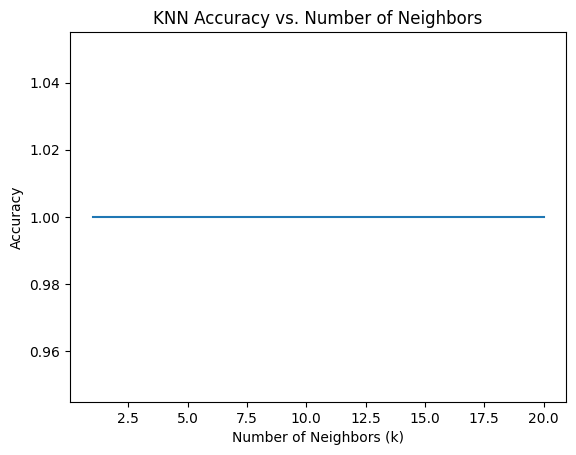

In [ ]:
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.show()

## Confusion Matrix

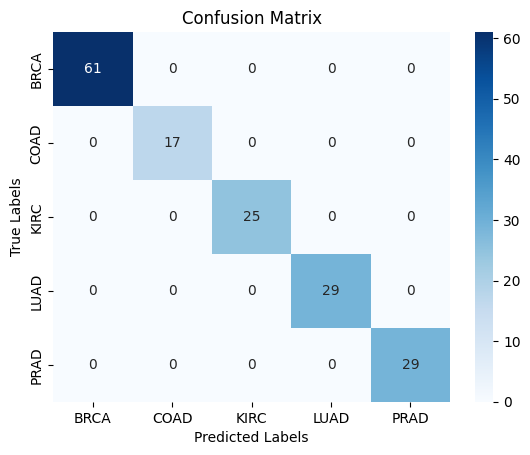

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
class_labels = label_encoder.classes_
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

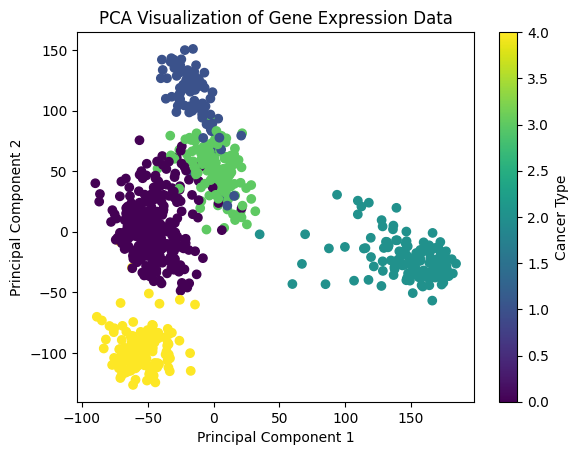

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=true_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Gene Expression Data')
plt.colorbar(label='Cancer Type')
plt.show()

In [ ]:
# Project name used for jovian.commit
project_name = 'Prediction-'